In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df_2009_2010 = pd.read_csv('../../data/df_2009_2010.csv')
df_2010_2011 = pd.read_csv('../../data/df_2010_2011.csv')

df_concat = pd.concat([df_2009_2010, df_2010_2011], ignore_index=True)

In [32]:
# Convert InvoiceDate to datetime format
df_concat['InvoiceDate'] = pd.to_datetime(df_concat['InvoiceDate'])

# Create a new column for total sales
df_concat['TotalSales'] = df_concat['Quantity'] * df_concat['Price']

In [33]:
df_concat.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


# Chiffre d'affaire 2009 - 2010

In [34]:
# Convert InvoiceDate to datetime format
df_2009_2010['InvoiceDate'] = pd.to_datetime(df_2009_2010['InvoiceDate'])

# Create a new column for total sales
df_2009_2010['TotalSales'] = df_2009_2010['Quantity'] * df_2009_2010['Price']

# Calculer le chiffre d'affaires total
ca_2009_2010 = df_2009_2010['TotalSales'].sum()

# Arrondir le chiffre d'affaires total à deux décimales
ca_2009_2010 = round(ca_2009_2010, 2)

print("Le chiffre d'affaires total de 2009 à 2010 est de : £", ca_2009_2010)


Le chiffre d'affaires total de 2009 à 2010 est de : £ 9539484.63


# Chiffre d'affaire 2010 - 2011

In [35]:
# Convert InvoiceDate to datetime format
df_2010_2011['InvoiceDate'] = pd.to_datetime(df_2010_2011['InvoiceDate'])

# Create a new column for total sales
df_2010_2011['TotalSales'] = df_2010_2011['Quantity'] * df_2010_2011['Price']

# Calculer le chiffre d'affaires total
ca_2010_2011 = df_2010_2011['TotalSales'].sum()

# Arrondir le chiffre d'affaires total à deux décimales
ca_2010_2011 = round(ca_2010_2011, 2)

print("Le chiffre d'affaires total de 2010 à 2011 est de : £", ca_2010_2011)

Le chiffre d'affaires total de 2010 à 2011 est de : £ 9747765.93


# Chiffre d'affaire de 2009 à 2011

In [36]:
# Calculer le chiffre d'affaires total
chiffre_affaires_total = df_concat['TotalSales'].sum()

# Arrondir le chiffre d'affaires total à deux décimales
chiffre_affaires_total_arrondi = round(chiffre_affaires_total, 2)

print("Le chiffre d'affaires total de 2009 à 2011 est de : £", chiffre_affaires_total_arrondi)

Le chiffre d'affaires total de 2009 à 2011 est de : £ 19287250.57


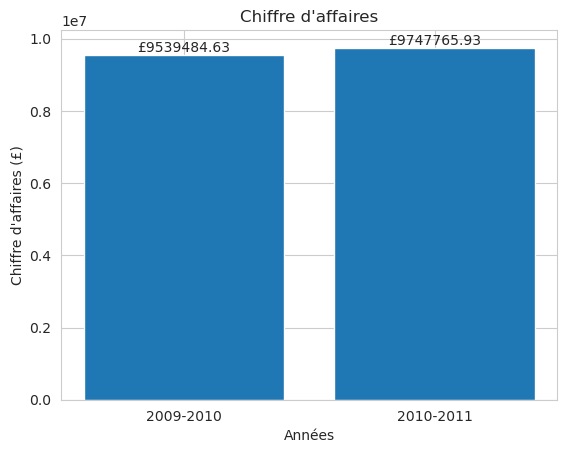

In [37]:
import matplotlib.pyplot as plt

# Chiffre d'affaires 2009-2010
ca_2009_2010 = 9539484.63  # Remplacez par votre valeur réelle
# Chiffre d'affaires 2010-2011
ca_2010_2011 = 9747765.93  # Remplacez par votre valeur réelle

# Créer les données pour le graphique
years = ['2009-2010', '2010-2011']
revenues = [ca_2009_2010, ca_2010_2011]

# Créer le graphique à barres
plt.bar(years, revenues)

# Ajouter des étiquettes aux barres
for i, revenue in enumerate(revenues):
    plt.text(i, revenue, f"£{revenue}", ha='center', va='bottom')

# Ajouter le titre et les étiquettes d'axe
plt.title("Chiffre d'affaires")
plt.xlabel('Années')
plt.ylabel('Chiffre d\'affaires (£)')

# Afficher le graphique
plt.show()


# Pourcentage d'augmentation du CA

In [38]:
# Calculer le pourcentage d'augmentation
percentage_increase = ((ca_2010_2011 - ca_2009_2010) / ca_2009_2010) * 100

# Arrondir le pourcentage à deux décimales
percentage_increase = round(percentage_increase, 2)

# Afficher le pourcentage d'augmentation
print("Le pourcentage d'augmentation du chiffre d'affaires est de :", percentage_increase, "%")

Le pourcentage d'augmentation du chiffre d'affaires est de : 2.18 %


In [41]:
df_concat.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


# Identifier les clients les plus importants en termes de chiffre d'affaires

In [42]:
import pandas as pd

# Calculer le chiffre d'affaires total par client
df_sales_by_customer = df_concat.groupby('Customer ID')['TotalSales'].sum()

# Trier les clients par chiffre d'affaires décroissant
top_customers = df_sales_by_customer.sort_values(ascending=False)

# Afficher les clients les plus importants
print("Top clients en termes de chiffre d'affaires :")
top_customers.head()


Top clients en termes de chiffre d'affaires :


Customer ID
18102.0    598215.22
14646.0    523342.07
14156.0    296564.69
14911.0    270248.53
17450.0    233579.39
Name: TotalSales, dtype: float64

In [52]:
df_concat[df_concat['Customer ID'] == 18102].head()
# Le meilleure client vient de United Kingdom

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales
54,489438,21329,DINOSAURS WRITING SET,28,2009-12-01 09:24:00,0.98,18102.0,United Kingdom,27.44
55,489438,21252,SET OF MEADOW FLOWER STICKERS,30,2009-12-01 09:24:00,1.69,18102.0,United Kingdom,50.70
56,489438,21100,CHARLIE AND LOLA CHARLOTTE BAG,30,2009-12-01 09:24:00,1.15,18102.0,United Kingdom,34.50
57,489438,21033,JUMBO BAG CHARLIE AND LOLA TOYS,30,2009-12-01 09:24:00,2.00,18102.0,United Kingdom,60.00
58,489438,20711,JUMBO BAG TOYS,60,2009-12-01 09:24:00,1.30,18102.0,United Kingdom,78.00


In [53]:
df_concat[df_concat['Customer ID'] == 14646].head()
# Le deuxieme meilleure client vient du Netherlands

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales
6433,489889,22271,FELTCRAFT DOLL ROSIE,96,2009-12-02 16:52:00,2.55,14646.0,Netherlands,244.80
6434,489889,22078,RIBBON REEL LACE DESIGN,120,2009-12-02 16:52:00,1.85,14646.0,Netherlands,222.00
6435,489889,22082,RIBBON REEL STRIPES DESIGN,120,2009-12-02 16:52:00,1.45,14646.0,Netherlands,174.00
6436,489889,22149,FELTCRAFT 6 FLOWER FRIENDS,120,2009-12-02 16:52:00,2.10,14646.0,Netherlands,252.00
6437,489889,22294,HEART FILIGREE DOVE SMALL,288,2009-12-02 16:52:00,1.06,14646.0,Netherlands,305.28


In [54]:
df_concat[df_concat['Customer ID'] == 14156].head()
# Le troisième meilleure client vient d'Irlande

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales
1000,489546,84050,PINK HEART SHAPE EGG FRYING PAN,6,2009-12-01 12:30:00,1.65,14156.0,EIRE,9.90
1001,489546,47568,ENGLISH ROSE DESIGN PEG BAG,6,2009-12-01 12:30:00,2.10,14156.0,EIRE,12.60
1002,489546,84782A,PINK 3 TIER GLASS PLATE STAND,2,2009-12-01 12:30:00,12.75,14156.0,EIRE,25.50
1003,489546,84782C,GREEN 3 TIER GLASS PLATE STAND,1,2009-12-01 12:30:00,12.75,14156.0,EIRE,12.75
1004,489546,21232,STRAWBERRY CERAMIC TRINKET BOX,12,2009-12-01 12:30:00,1.25,14156.0,EIRE,15.00


In [55]:
df_concat[df_concat['Customer ID'] == 14911].head()
# Le quatrième meilleur client d'Irlande

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales
440,489520,35751C,PURPLE CURRENT CANDLE RING,12,2009-12-01 11:41:00,0.75,14911.0,EIRE,9.0
441,489520,72739B,WHITE CHOCOLATE SCENT CANDLE,12,2009-12-01 11:41:00,1.25,14911.0,EIRE,15.0
442,489520,22114,HOT WATER BOTTLE TEA AND SYMPATHY,8,2009-12-01 11:41:00,3.95,14911.0,EIRE,31.6
443,489520,22212,FOUR HOOK WHITE LOVEBIRDS,6,2009-12-01 11:41:00,2.10,14911.0,EIRE,12.6
444,489520,21523,FANCY FONT HOME SWEET HOME DOORMAT,2,2009-12-01 11:41:00,6.75,14911.0,EIRE,13.5


In [56]:
df_concat[df_concat['Customer ID'] == 17450].head()
# Le cinquième meilleur client vient d'United Kingdom

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales
358816,524181,22357,KINGS CHOICE BISCUIT TIN,704,2010-09-27 16:59:00,4.56,17450.0,United Kingdom,3210.24
358817,524181,21770,OPEN CLOSED METAL SIGN,684,2010-09-27 16:59:00,5.15,17450.0,United Kingdom,3522.60
358818,524181,22612,TEA COSY VINTAGE UNION JACK,408,2010-09-27 16:59:00,4.14,17450.0,United Kingdom,1689.12
358819,524181,21621,VINTAGE UNION JACK BUNTING,408,2010-09-27 16:59:00,8.87,17450.0,United Kingdom,3618.96
358820,524181,46000M,POLYESTER FILLER PAD 45x45cm,648,2010-09-27 16:59:00,0.00,17450.0,United Kingdom,0.00


# Top 10 des meilleurs clients

In [57]:
# Groupement par "Customer ID" et "Country" et calcul du chiffre d'affaires total
customer_sales = df_concat.groupby(['Customer ID', 'Country']).sum()['TotalSales'].reset_index()

# Trier les clients par chiffre d'affaires décroissant
top_10_customers = customer_sales.sort_values('TotalSales', ascending=False).head(10)

# Afficher le top 10 des meilleurs clients avec leurs pays
print("Top 10 des meilleurs clients :")
print(top_10_customers[['Customer ID', 'Country', 'TotalSales']])


Top 10 des meilleurs clients :
      Customer ID         Country  TotalSales
5769      18102.0  United Kingdom   598215.22
2313      14646.0     Netherlands   523342.07
1823      14156.0            EIRE   296564.69
2578      14911.0            EIRE   270248.53
5117      17450.0  United Kingdom   233579.39
1361      13694.0  United Kingdom   190825.52
5178      17511.0  United Kingdom   171885.98
72        12415.0       Australia   143269.29
4351      16684.0  United Kingdom   141502.25
2728      15061.0  United Kingdom   136391.48


/tmp/ipykernel_16125/2854572526.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



# Tendances des ventes mensuelles

In [44]:
import pandas as pd

# Convertir la colonne "InvoiceDate" en format de date
df_concat['InvoiceDate'] = pd.to_datetime(df_concat['InvoiceDate'])

# Regrouper les données par mois et calculer les ventes totales mensuelles
monthly_sales = df_concat.resample('M', on='InvoiceDate')['TotalSales'].sum()

# Afficher les ventes mensuelles
print("Ventes mensuelles :")
print(monthly_sales)


Ventes mensuelles :
InvoiceDate
2009-12-31     799847.110
2010-01-31     624032.892
2010-02-28     533091.426
2010-03-31     765848.761
2010-04-30     590580.432
2010-05-31     615322.830
2010-06-30     679786.610
2010-07-31     575236.360
2010-08-31     656776.340
2010-09-30     853650.431
2010-10-31    1045168.350
2010-11-30    1422654.642
2010-12-31    1126445.470
2011-01-31     560000.260
2011-02-28     498062.650
2011-03-31     683267.080
2011-04-30     493207.121
2011-05-31     723333.510
2011-06-30     691123.120
2011-07-31     681300.111
2011-08-31     682680.510
2011-09-30    1019687.622
2011-10-31    1070704.670
2011-11-30    1461756.250
2011-12-31     433686.010
Freq: M, Name: TotalSales, dtype: float64


In [49]:
import plotly.graph_objects as go

# Créer la figure et les barres du graphique en utilisant Plotly
fig = go.Figure(data=[go.Bar(x=monthly_sales['InvoiceDate'], y=monthly_sales['TotalSales'])])

# Ajouter les étiquettes et le titre
fig.update_layout(title='Tendances des ventes mensuelles',
                  xaxis_title='Mois',
                  yaxis_title='Ventes')

# Ajouter l'interactivité pour afficher le chiffre d'affaires au survol de la souris
fig.update_traces(hovertemplate='Chiffre d\'affaires: %{y:.2f}')

# Afficher le graphique interactif
fig.show()


In [51]:
import plotly.express as px

# Group by month and calculate total sales
sales_trend = df_concat.groupby(df_concat['InvoiceDate'].dt.to_period('M')).sum()['TotalSales']

# Convert sales_trend to a DataFrame for Plotly
sales_trend_df = pd.DataFrame({'Month': sales_trend.index.to_timestamp(), 'Total Sales': sales_trend.values})

# Create the interactive line plot with Plotly
fig = px.line(sales_trend_df, x='Month', y='Total Sales', title='Sales Trend (2009-2011)')

# Add hover information
fig.update_traces(hovertemplate='<b>%{x}</b><br>Total Sales: %{y:.2f}')

# Customize the layout
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Total Sales',
    hovermode='x',
    xaxis_tickangle=-45,
    yaxis=dict(gridcolor='lightgray'),
    plot_bgcolor='white'
)

# Show the interactive plot
fig.show()


/tmp/ipykernel_16125/2391505079.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

